# Homework 6 Xiwen Li

### Q1

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
MNIST_TRAIN = np.load('./MNIST_train_100.npz')
print(MNIST_TRAIN.keys())

['train_labels', 'train_images']


In [3]:
MNIST_TRAIN['train_images'].shape

(100, 28, 28)

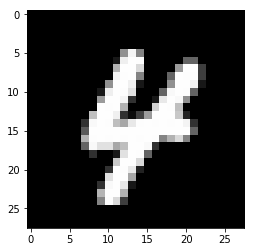

In [4]:
images_train = MNIST_TRAIN['train_images']
plt.imshow(images_train[0,:,:],cmap='Greys_r')

In [5]:
labels_train = MNIST_TRAIN['train_labels']
labels_train.shape

(100,)

In [6]:
labels_one_hot_train = pd.get_dummies(labels_train)

In [7]:
pd.Series(labels_train).value_counts()

9    58
4    42
dtype: int64

In [8]:
images_train_reshaped = images_train.reshape((100, 28 * 28))

In [9]:
images_train_reshaped.shape

(100, 784)

In [10]:
x = tf.placeholder(dtype = 'float32',shape=[100,784])
y = tf.placeholder(dtype = 'float32', shape=[100,2])
w = tf.Variable(tf.truncated_normal([784,2], stddev=1))
b = tf.Variable(tf.truncated_normal([1,2], stddev=1))

In [11]:
y1 = tf.nn.softmax(tf.matmul(x, w) + b)
loss = tf.reduce_mean(tf.square(y - y1))

In [12]:
optimizer = tf.train.AdamOptimizer().minimize(loss)
init = tf.global_variables_initializer()

In [13]:
sess = tf.Session()
MAXSTEPS = 1000000
MOD=100000
#initialize all variables
sess.run(init)

In [14]:
for step in range(MAXSTEPS+1):
    (_, loss_opt) = sess.run([optimizer,loss],feed_dict={x: images_train_reshaped, y: labels_one_hot_train})
    if (step % MOD) == 0:
        print(step, loss_opt)

0 0.533867
100000 3.17834e-11
200000 1.38066e-11
300000 8.81034e-12
400000 6.58079e-12
500000 5.31711e-12
600000 4.50367e-12
700000 3.92134e-12
800000 3.50772e-12
900000 3.1695e-12
1000000 2.94766e-12


In [15]:
(yp_training) = sess.run(y1, feed_dict={x:images_train_reshaped})

In [16]:
MNIST_TEST = np.load('./MNIST_test_100.npz')
print(MNIST_TEST.keys())

['test_images', 'test_labels']


In [17]:
images_test = MNIST_TEST['test_images']

In [18]:
images_test_reshaped = images_test.reshape((100, 28*28))

In [19]:
labels_test = MNIST_TEST['test_labels']

In [20]:
labels_one_hot_test = pd.get_dummies(labels_test)

In [21]:
(yp_testing) = sess.run(y1, feed_dict={x:images_test_reshaped})

In [22]:
err_test = (yp_testing.argmax(axis=1) != labels_one_hot_test.values.argmax(axis=1)).sum()

In [23]:
err_train=(yp_training.argmax(axis=1) != labels_one_hot_train.values.argmax(axis=1)).sum()

In [24]:
yp_testing.argmax(axis=1) != labels_one_hot_test.values.argmax(axis=1)

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False, False], dtype=bool)

In [25]:
yp_training.argmax(axis=1) != labels_one_hot_train.values.argmax(axis=1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [26]:
err_train = err_train / labels_one_hot_train.shape[0]
err_test = err_test / labels_one_hot_test.shape[0]
print("error_rate_train: ", err_train)
print("error_rate_test: ", err_test)

error_rate_train:  0.0
error_rate_test:  0.1


### The generalization error rate I got is 0.1. One thing I tried was increasing the size of max steps. My maximun step size was 20000. Right now I increased it to 1000000. I could also lower the learning rate to let it find the minimun loss value.
